# Advanced Regression Assignment - Housing Price Prediction

This assignment is a programming assignment as part of upGrad IIIT-B Executive Post Graduate program to build advanced regression model using regularisation for the prediction of Housing Prices.

Submitted by: Kiran Kumar Valluru

#### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

 
The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal 

 

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. The management can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Reading and Understanding the Data

In [639]:
#Import libraries
 
# numpy & pandas
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# model building libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [640]:
#read data
house_data = pd.read_csv('train.csv')

##### Inspect various aspects of house dataframe

In [641]:
#check the head of dataset 
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [642]:
#check the shape of dataframe
house_data.shape

(1460, 81)

In [643]:
#check the descriptive information
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [644]:
#checking numerical columns data distribution statistics
house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Inference: 
  - Dataset has 1460 rows and 81 columns.
  - There is a mix of integer, float and object data type columns. 
  
    

### Data cleaning and Visualization

 - Null values
 - Drop unnecessary rows and column
 - Imputing missing values

In [645]:
#Checking the percentage of Null values in all the columns
round(100*(house_data.isnull().sum()/len(house_data.index)),2).sort_values(ascending=False)[ round(house_data.isnull().sum()/len(house_data.index),2) > 0 ]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64

18 features have missing values, out of which 5 features have more than 45% missing values.

Based on the above extract, keeping columns with more than 80% missing values is not meaningful in the model building. so, let's drop them straight away

In [646]:
#dropping columns with more than 80% missing values 
house_data = house_data.drop(['Fence','Alley','MiscFeature','PoolQC'],axis='columns')

Also, We could see there are many missing values in some of the columns which may contribute our analysis, so instead of dropping them we replace with other values to segregate the items

In [647]:
house_data.FireplaceQu.fillna('No Fireplace',inplace=True)
house_data.GarageCond.fillna('No Garage',inplace=True)
house_data.GarageType.fillna('No Garage',inplace=True)
house_data.GarageFinish.fillna('No Garage',inplace=True)
house_data.GarageQual.fillna('No Garage',inplace=True)
house_data.BsmtExposure.fillna('No Basement',inplace=True)
house_data.BsmtFinType1.fillna('No Basement',inplace=True)
house_data.BsmtFinType2.fillna('No Basement',inplace=True)
house_data.BsmtQual.fillna('No Basement',inplace=True)
house_data.BsmtCond.fillna('No Basement',inplace=True)

In [649]:
#checking again the percentage of Null values in all the columns
round(100*(house_data.isnull().sum()/len(house_data.index)),2).sort_values(ascending=False)[ round(house_data.isnull().sum()/len(house_data.index),2) > 0 ]

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrType      0.55
MasVnrArea      0.55
dtype: float64

lets deep dive the analysis on these 4 variable and see what best we can fit


'LotFrontage' : Linear feet of street connected to property.

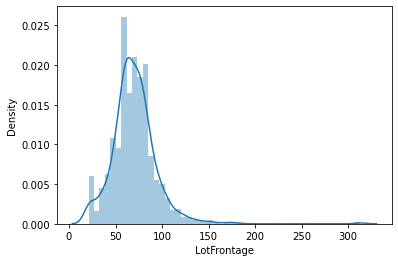

In [650]:
#distplot on 'LotFrontage'
sns.distplot(house_data.LotFrontage)
plt.show()

In [651]:
#Fill null values of 'LotFrontage' with the median value based on the above distplot
house_data.LotFrontage.fillna(house_data.LotFrontage.median(),inplace=True)

'GarageYrBlt': Year garage was built

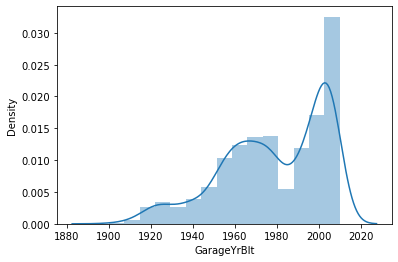

In [652]:
#distplot on 'GarageYrBlt'
sns.distplot(house_data.GarageYrBlt)
plt.show()

In [653]:
#Fill null values of 'GarageYrBlt' with the median value based on the above distplot
house_data.GarageYrBlt.fillna(house_data.GarageYrBlt.median(),inplace=True)

Checking value counts for 'MasVnrType' and 'MasVnrArea'

In [654]:
house_data['MasVnrType'].value_counts()


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [655]:
house_data['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

Considering the small chunk of null values, we can replace with mode for 'MasVnrType' and mean for 'MasVnrArea'

In [656]:
#Filling null values of 'MasVnrType' with mode and 'MasVnrArea' with mean value
house_data.MasVnrType.fillna('None',inplace=True)
house_data.MasVnrArea.fillna(house_data.MasVnrArea.mean(),inplace=True)

In [657]:
#checking again the percentage of Null values in all the columns
round(100*(house_data.isnull().sum()/len(house_data.index)),2).sort_values(ascending=False)[ round(house_data.isnull().sum()/len(house_data.index),2) > 0 ]

Series([], dtype: float64)

Perfect, we completed null values replacement as per the data , and now we are good to go with EDA part but before that lets do health check of dataframe

In [658]:
#Check the shape of dataframe
house_data.shape

(1460, 77)

Below variable gives information about years of construction
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)

Lets derive new column HouseAge of building and dropping the other columns. Important point to know , we need to take "YearRemodAdd" date as house was re-model.

In [659]:
#creating new derived column for House Age
house_data['HouseAge'] = house_data['YrSold'] - house_data['YearRemodAdd']
house_data['HouseAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: HouseAge, dtype: int64

Let's drop the above year columns which are of no use anymore; also, dropping 'Id' column which is not significant for the analysis

In [660]:
#dropping unnecessary columns 
house_data = house_data.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd','Id'],axis='columns')

In [661]:
#Checking shape of house dataset
house_data.shape

(1460, 73)

In [662]:
## Lets take variable which are highly correlated , that mean lets say 85% almosst same value. We will first normalize and then find those variable

non_normalize_cols = {}
for col in house_data.columns:
    max_val = max(list(house_data[col].value_counts(normalize=True).sort_values(ascending=False).head(1)))
    if max_val >= 0.85:
        non_normalize_cols[col] = round(max_val,2)
        
pd.DataFrame({'Features': list(non_normalize_cols.keys()), 'Percentage': list(non_normalize_cols.values())})

Features  Percentage
0          Street        1.00
1     LandContour        0.90
2       Utilities        1.00
3       LandSlope        0.95
4      Condition1        0.86
5      Condition2        0.99
6        RoofMatl        0.98
7       ExterCond        0.88
8        BsmtCond        0.90
9    BsmtFinType2        0.86
10     BsmtFinSF2        0.89
11        Heating        0.98
12     CentralAir        0.93
13     Electrical        0.91
14   LowQualFinSF        0.98
15   BsmtHalfBath        0.94
16   KitchenAbvGr        0.95
17     Functional        0.93
18     GarageQual        0.90
19     GarageCond        0.91
20     PavedDrive        0.92
21  EnclosedPorch        0.86
22      3SsnPorch        0.98
23    ScreenPorch        0.92
24       PoolArea        1.00
25        MiscVal        0.96
26       SaleType        0.87

these are highly correlated and henceforth straightway can be dropped from the analysis

In [663]:
# dropping correlated columns from the analysis
house_data = house_data.drop(non_normalize_cols.keys(), axis=1)

In [664]:
house_data.shape

(1460, 46)

#### Handle Outliers

Let's check how much percentage of data will be available if we remove the outliers

In [665]:
#Let's calculate using Inter-Quartile Range  
numFeatures = house_data.select_dtypes(['int64','float64']).columns

house_data_outliers = house_data

#Calculate for numFeatures variables
for k in numFeatures:
    IQR = house_data_outliers[k].quantile(.75) - house_data_outliers[k].quantile(.25)
    house_data_outliers = house_data_outliers[(house_data_outliers[k] < (house_data_outliers[k].quantile(.75) + 1.5 * IQR)) & (house_data_outliers[k] > (house_data_outliers[k].quantile(.25) - 1.5 * IQR))]

house_data_outliers.shape[0]/house_data.shape[0] * 100

58.56164383561644

So, it would not be wise option to remove all outliers considering data left after remving outliers will be only 58.56% which will anyway impact the model building

Let's now check using 99% and above outliers removal and the percentage of data that will be available

In [666]:
#Let's calculate using Inter-Quartile Range  
numFeatures = house_data.select_dtypes(['int64','float64']).columns

house_data_outliers = house_data

#Calculate for numFeatures variables
for k in numFeatures:
    IQR = house_data_outliers[k].quantile(.99) - house_data_outliers[k].quantile(.25)
    house_data_outliers = house_data_outliers[(house_data_outliers[k] < (house_data_outliers[k].quantile(.99) + 1.5 * IQR)) & (house_data_outliers[k] > (house_data_outliers[k].quantile(.25) - 1.5 * IQR))]

house_data_outliers.shape[0]/house_data.shape[0] * 100

99.52054794520548

We have a good amount of data retained. Let's proceed to remove the outlier data 

In [667]:
#Outlier treatment. Drop outliers  

numFeatures = house_data.select_dtypes(['int64','float64']).columns

def drop_outliers(x):
    list = []
    for col in numFeatures:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_data = drop_outliers(house_data)

In [668]:
#check shape of dataset after outliers removal
house_data.shape

(1453, 46)

#### Let us check the distribution of our target variable before Scaling and Splitting

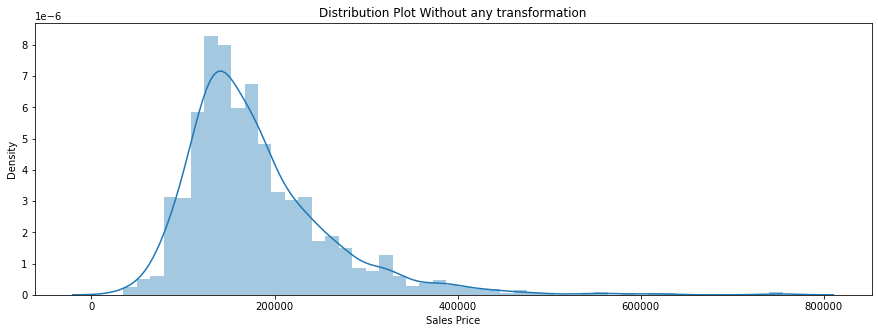

In [669]:
#plotting distribution of 'SalePrice'  without transformation and see behaviour

plt.figure(figsize=(15,5))
sns.distplot(house_data.SalePrice)
plt.xlabel("Sales Price")
plt.title('Distribution Plot Without any transformation')
plt.show()

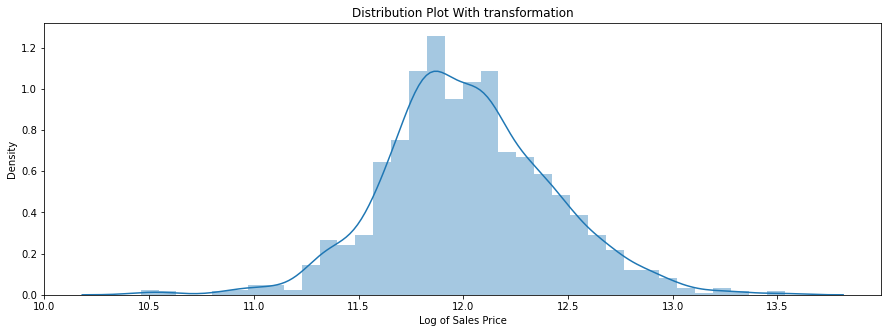

In [670]:
#plotting distribution of 'SalePrice' tranform the dependent variable by taking LOG 

plt.figure(figsize=(15,5))
sns.distplot(np.log(house_data.SalePrice))
plt.xlabel("Log of Sales Price")
plt.title('Distribution Plot With transformation')
plt.show()

By applying log transformation on dependent column, we get normal distribution of data from originally right skewed distribution. Hence it is better to apply transformation on SalePrice column for pure model building.

In [671]:
#apply log transformation on 'SalePrice'
house_data['SalePrice'] = np.log(house_data.SalePrice)

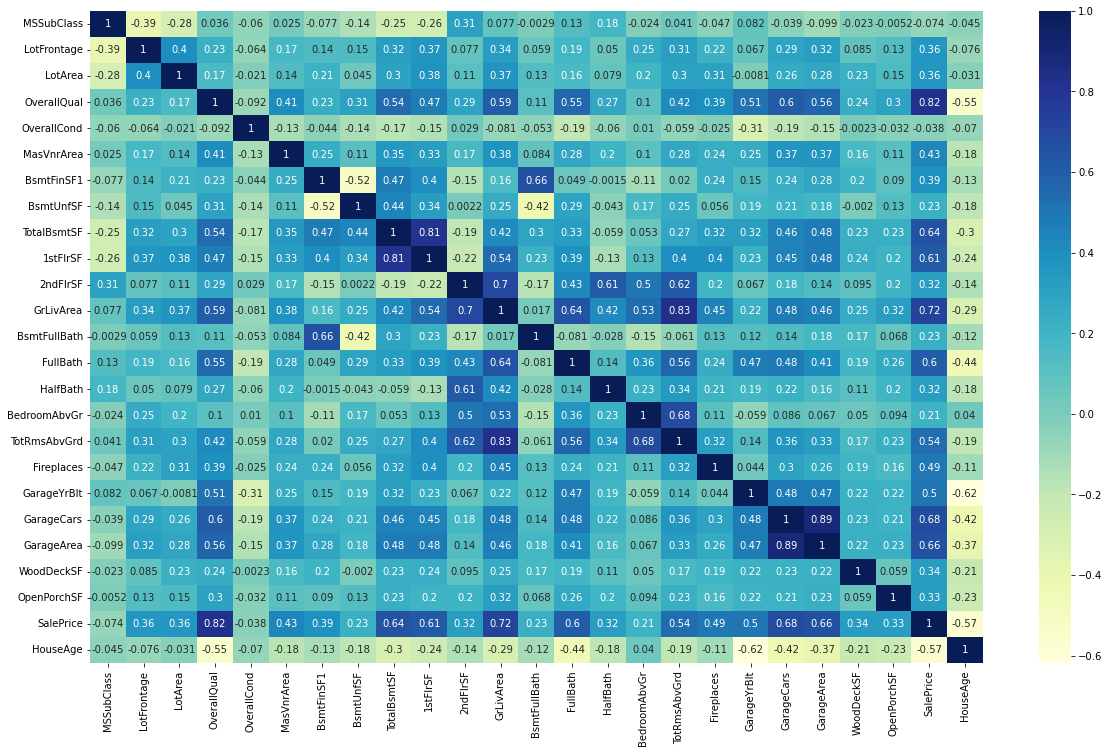

In [672]:
#Let's check the correlation coefficients using HeatMap. 
plt.figure(figsize = (20, 12))
sns.heatmap(house_data.corr(), annot = True, cmap="YlGnBu")
plt.yticks(rotation=0)
plt.show()

Based on above heat-map below are the highly correlated features
- 'TotalBsmtSF' and '1stFlrSF' have 82% correlation
- 'TotRmsAbvGrd' and 'GrLivArea' have 83% correlation
- 'GarageCars' and 'GarageArea' have 88% correlation as both we cannot remove so let’s drop '1stFlrSF', 'TotRmsAbvGrd' and 'GarageArea'.

In [673]:
#dropping columns that are highly correlated 
house_data.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

#### Let's plot and analyse numerical features and categorical features 

In [674]:
# numFeatures columns
numFeatures = list(house_data.select_dtypes(['int64', 'float64']))
numFeatures

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'HouseAge']

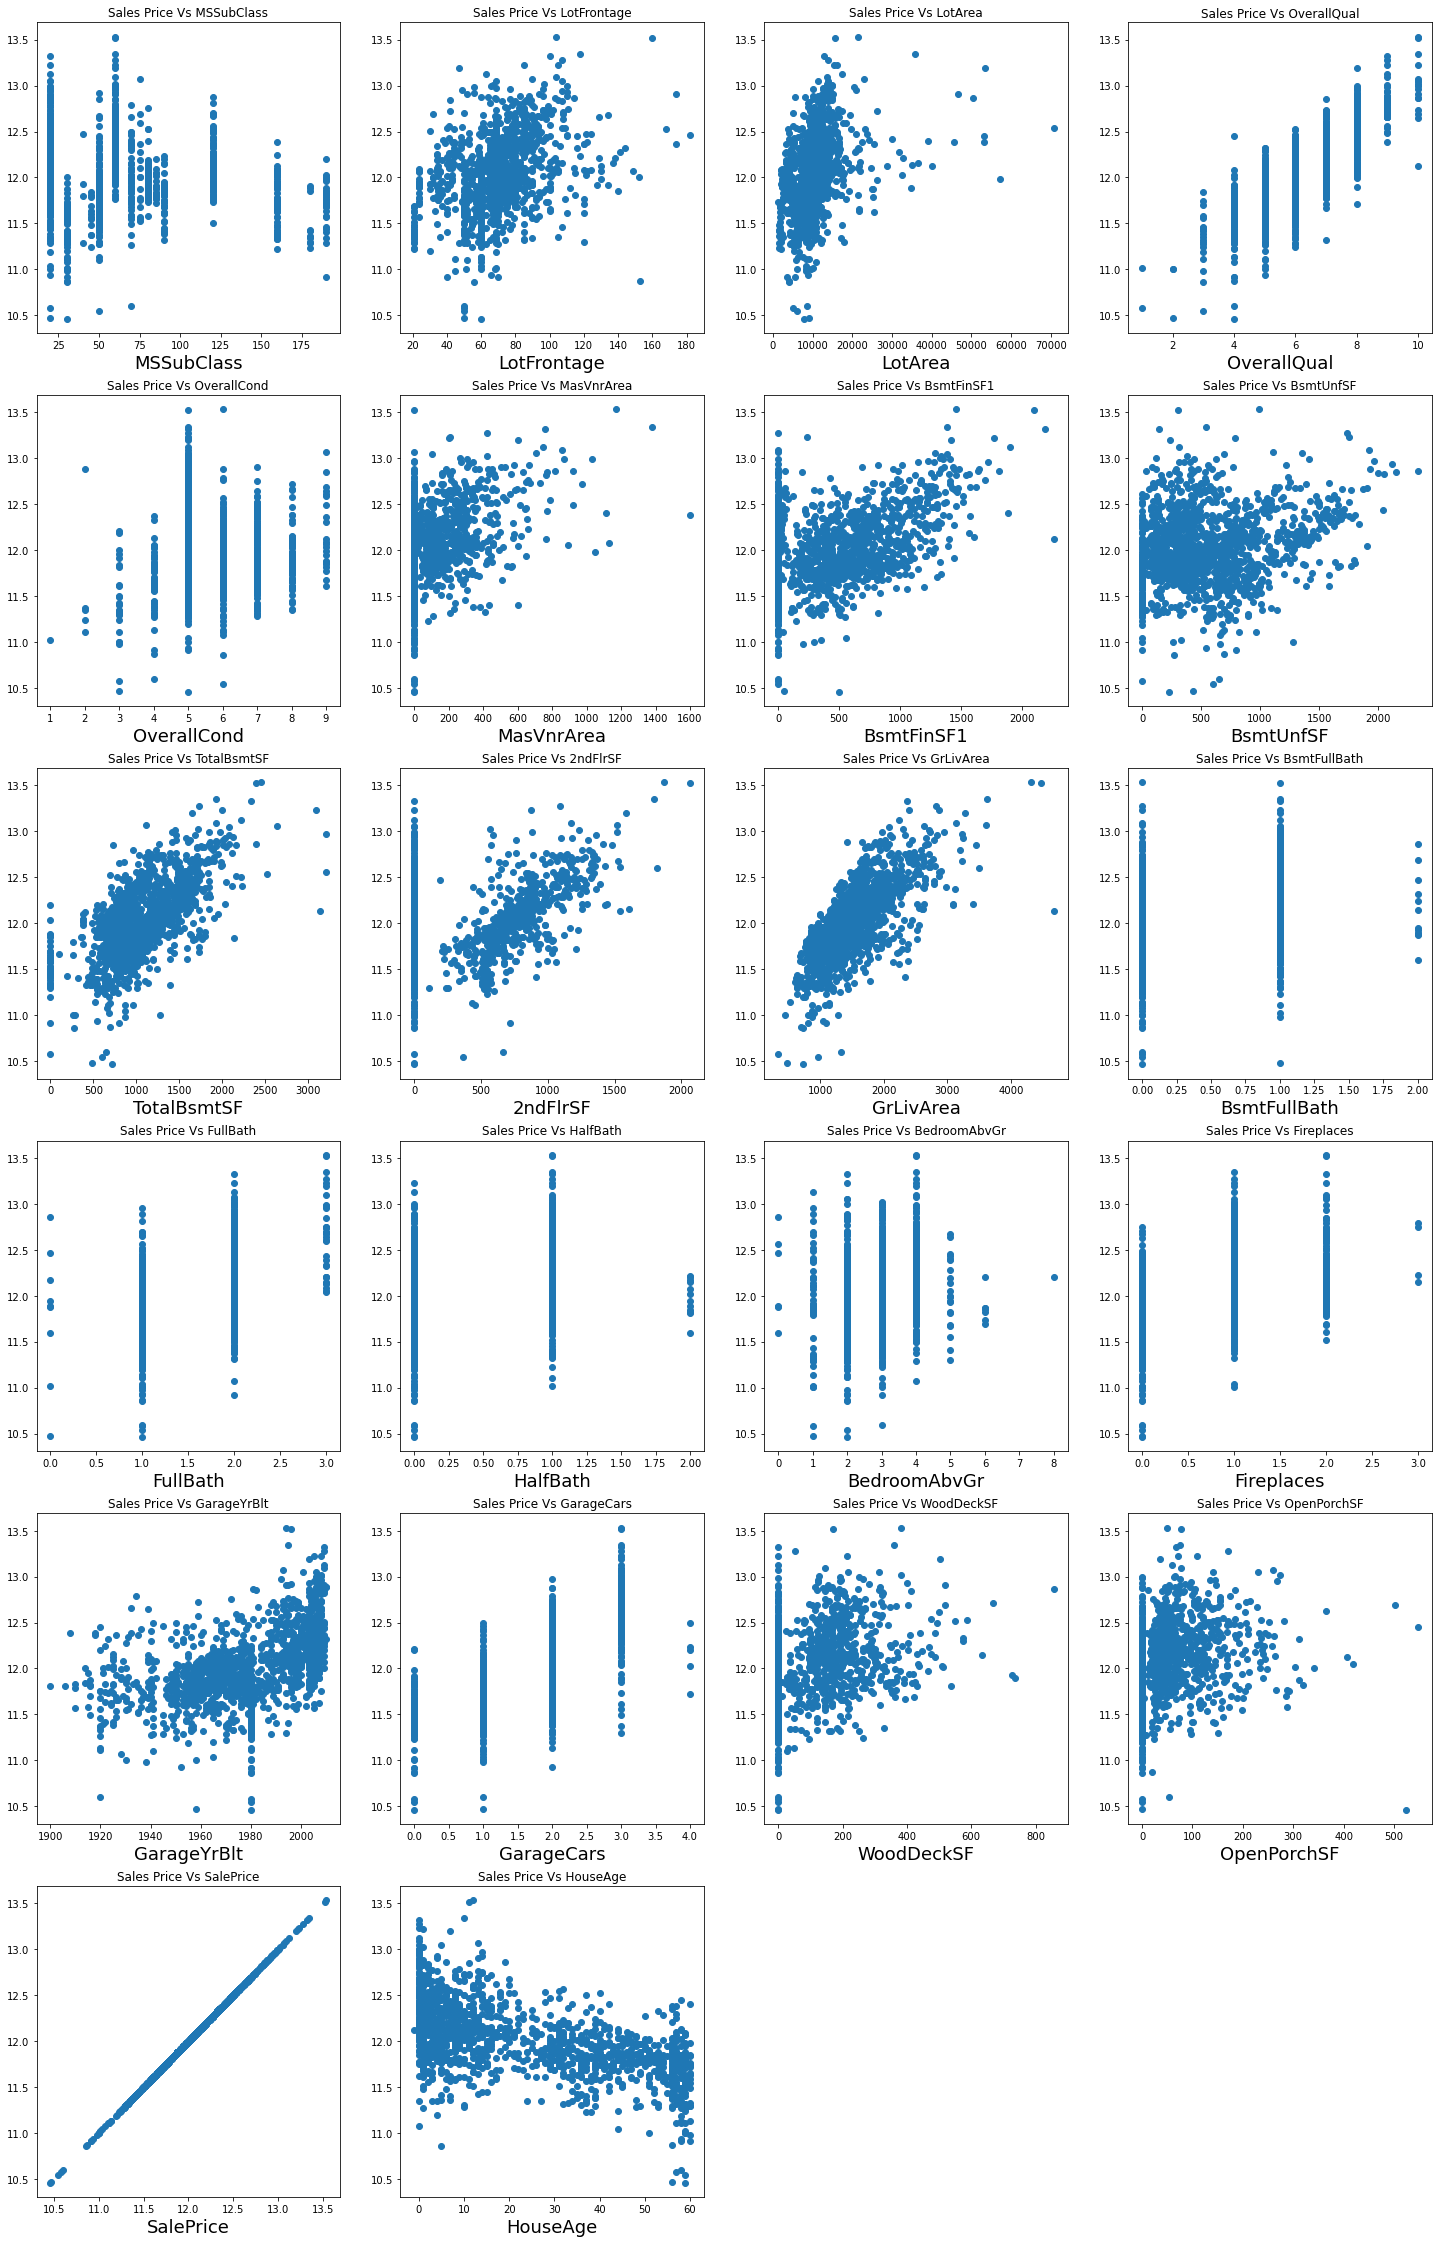

In [675]:
#let’s plot a graph using scatter plot for all numFeatures data with target variable 'SalePrice'

plt.figure(figsize=(25,40))
for i, j in enumerate(numFeatures):
    plt.subplot(6,4,i+1)
    plt.scatter(house_data[j], house_data['SalePrice'])
    plt.xlabel(j,fontsize=18)
    plt.title("Sales Price Vs " + j)
plt.show()

In [676]:
#catFeatures columns
catFeatures = list(house_data.select_dtypes('object'))
catFeatures

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

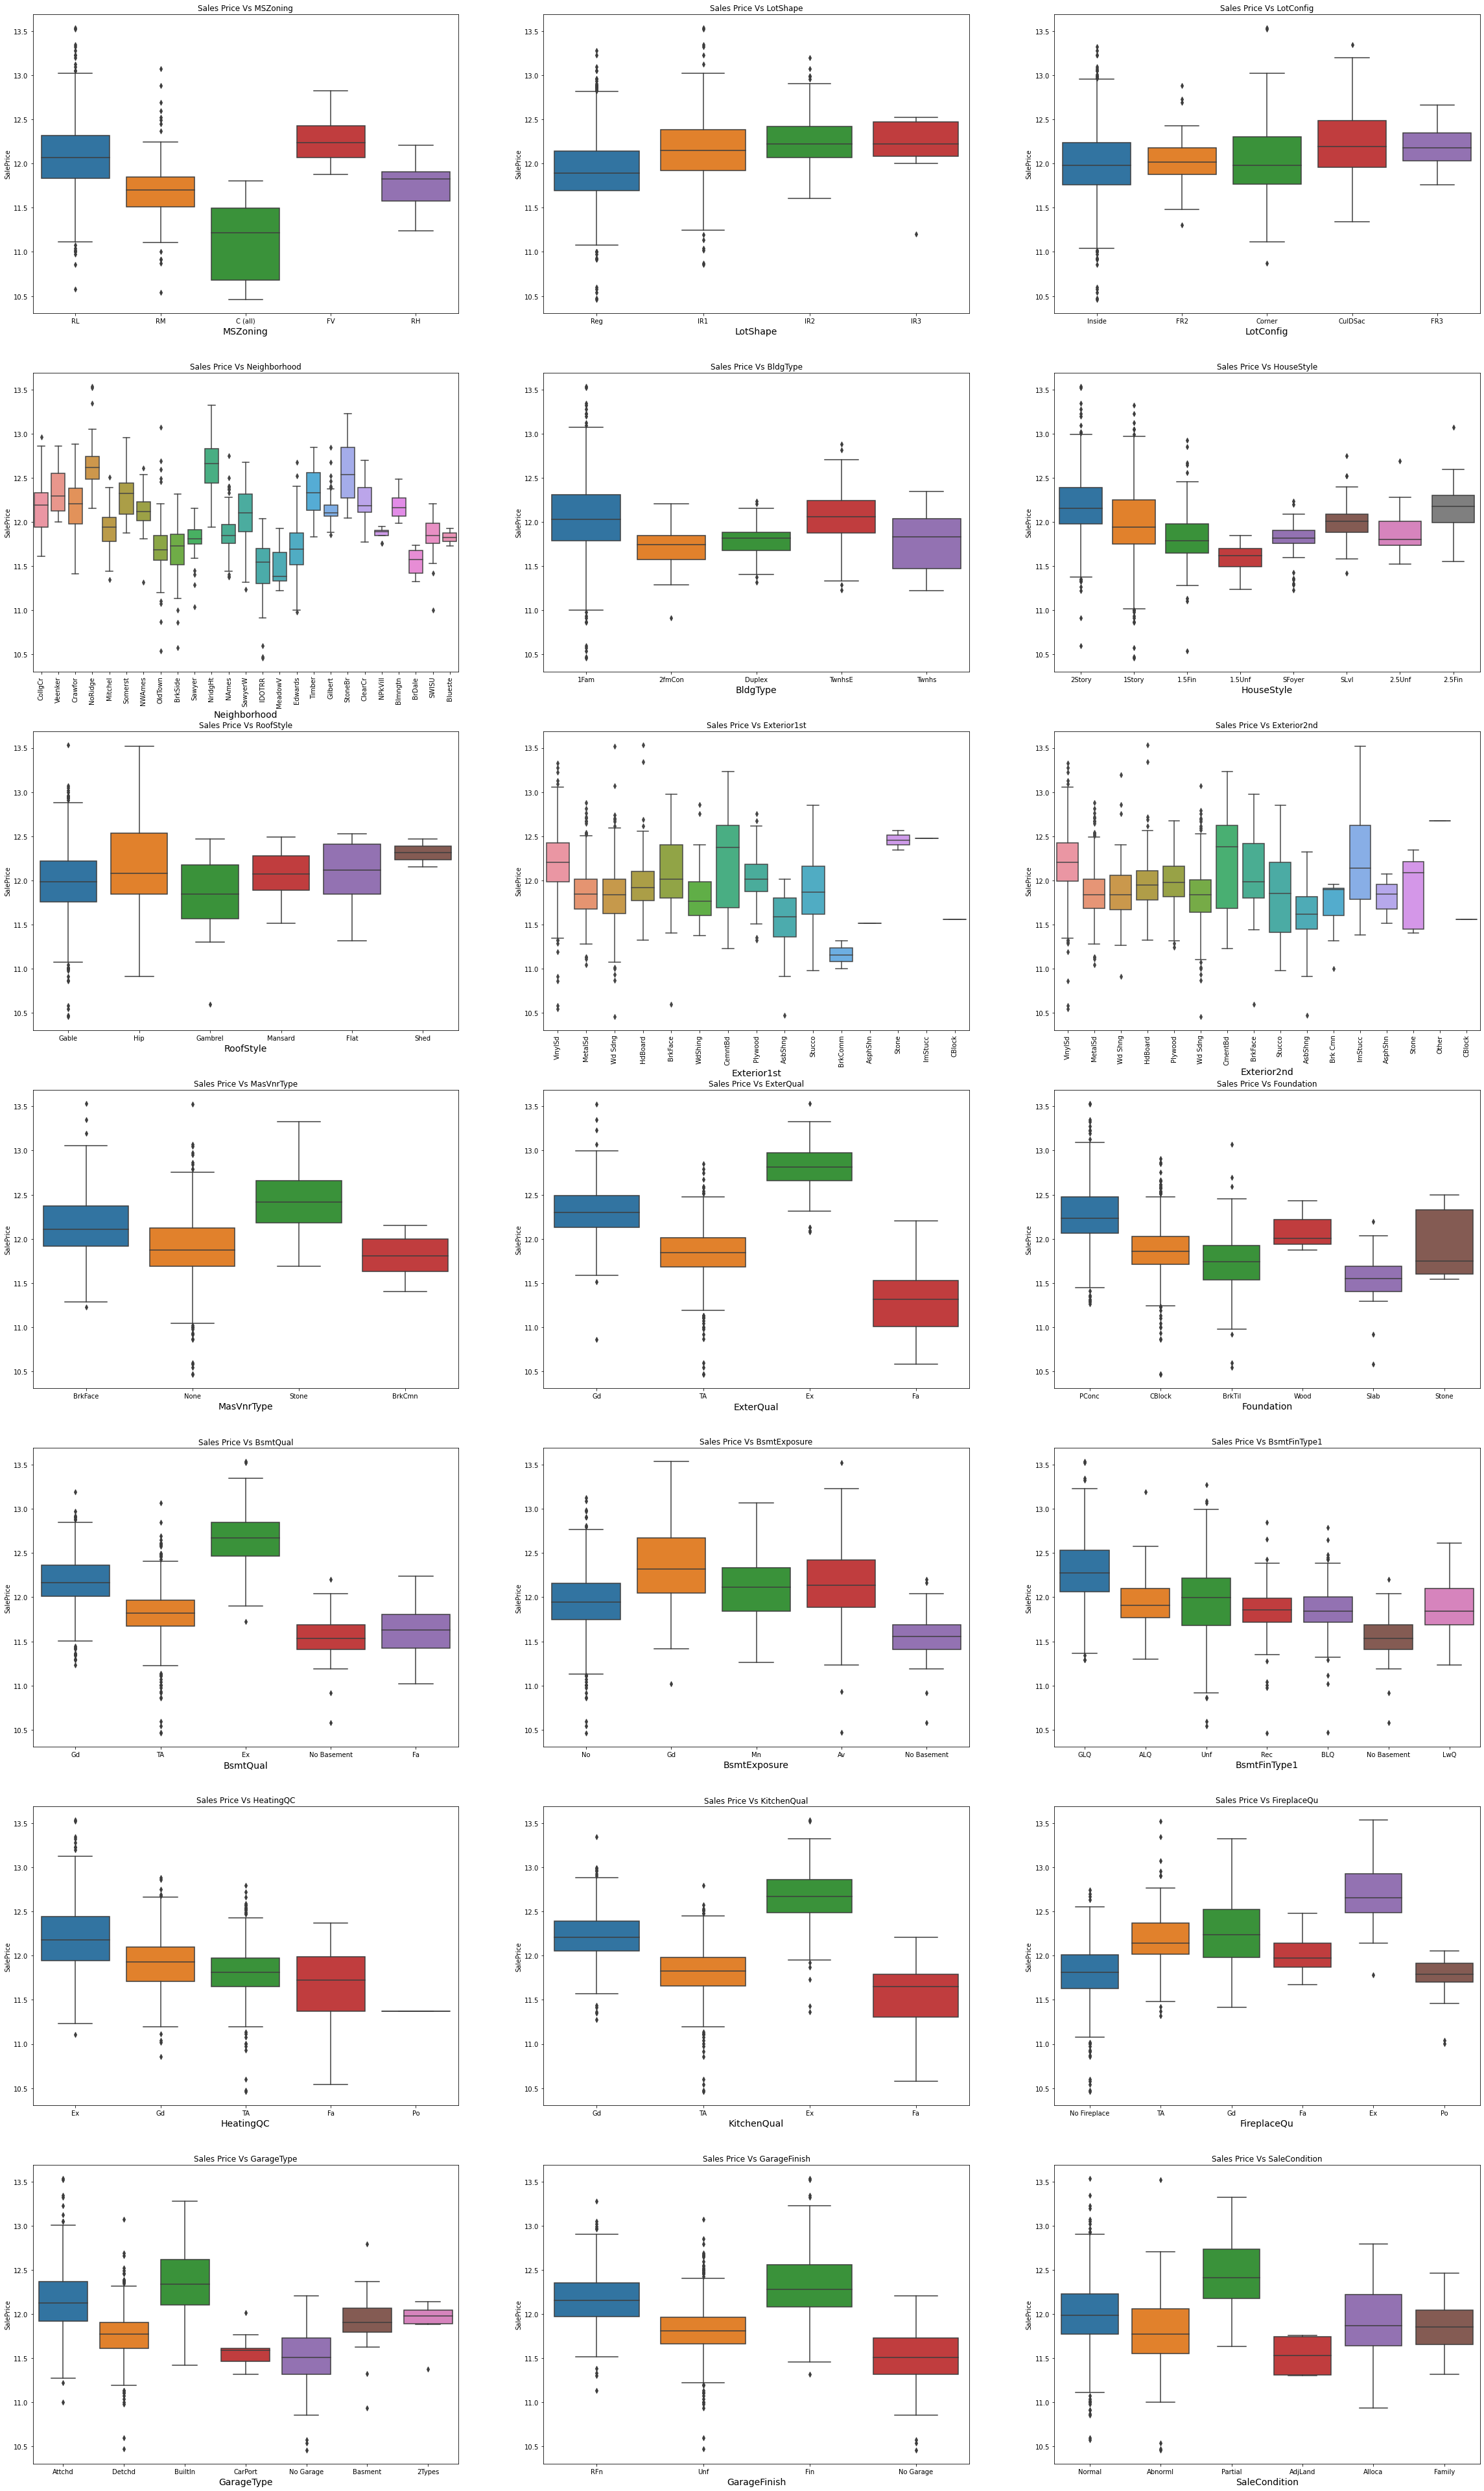

In [677]:
#Plot categorical features 
plt.figure(figsize=(40,100))
for m, n in enumerate(catFeatures):
    plt.subplot(10, 3, (m+1))
    sns.boxplot(x=n, y='SalePrice',data=house_data)
    plt.xlabel(n, fontsize=14)
    plt.title("Sales Price Vs " + n)
    if n == "Neighborhood" or n == "Exterior1st" or n == "Exterior2nd":
        plt.xticks(rotation=90)
plt.show()

### Data Preparation
In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s. 

So let's do it for all columns which is having string values by using Dummy Variable concept.

But before that, it is always better option to convert ordered categorical variable into numeric type rather than converting them into dummies as they add value to our model.

In [678]:
#Checking value_counts to see if there are any missing data
house_data.LotShape.value_counts()

Reg    924
IR1    483
IR2     38
IR3      8
Name: LotShape, dtype: int64

In [679]:
house_data.ExterQual.value_counts()

TA    901
Gd    487
Ex     51
Fa     14
Name: ExterQual, dtype: int64

In [680]:
house_data.BsmtQual.value_counts()

TA             648
Gd             613
Ex             120
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [681]:
house_data.BsmtExposure.value_counts()

No             953
Av             221
Gd             127
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [682]:
house_data.BsmtFinType1.value_counts()

Unf            430
GLQ            414
ALQ            218
BLQ            148
Rec            132
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [683]:
house_data.HeatingQC.value_counts()

Ex    738
TA    425
Gd    240
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [684]:
house_data.KitchenQual.value_counts()

TA    732
Gd    583
Ex     99
Fa     39
Name: KitchenQual, dtype: int64

In [685]:
house_data.FireplaceQu.value_counts()

No Fireplace    689
Gd              376
TA              311
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [686]:
house_data.GarageFinish.value_counts()

Unf          604
RFn          420
Fin          349
No Garage     80
Name: GarageFinish, dtype: int64

Below are the ordered categorical variables which need to be converted to numerical values:
- 'LotShape': General shape of property
- 'ExterQual': Evaluates the quality of the material on the exterior
- 'BsmtQual': Evaluates the height of the basement
- 'BsmtExposure': Refers to walkout or garden level walls
- 'BsmtFinType1': Rating of basement finished area
- 'HeatingQC': Heating quality and condition
- 'KitchenQual': Kitchen quality
- 'FireplaceQu': Fireplace quality
- 'GarageFinish': Interior finish of the garage

#### Converting ordered categorical variables to numerical 

In [687]:
#mapping is based on the data dictionaty for LotShape
house_data['LotShape'] = house_data['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})

#mapping is based on the data dictionaty for ExterQual
house_data['ExterQual'] = house_data['ExterQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#mapping is based on the data dictionaty for BsmtQual
house_data['BsmtQual'] = house_data['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0})

#mapping is based on the data dictionaty for BsmtExposure
house_data['BsmtExposure'] = house_data['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

#mapping is based on the data dictionaty for BsmtFinType1
house_data['BsmtFinType1'] = house_data['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0})

#mapping is based on the data dictionaty
house_data['HeatingQC'] = house_data['HeatingQC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#mapping is based on the data dictionaty for KitchenQual
house_data['KitchenQual'] = house_data['KitchenQual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

#mapping is based on the data dictionaty for FireplaceQu
house_data['FireplaceQu'] = house_data['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})

#mapping is based on the data dictionaty for GarageFinish
house_data['GarageFinish'] = house_data['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No Garage':0})

In [688]:
#check head data after mapping ordered categorical variables to numeric
house_data.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450         3    Inside      CollgCr   
1          20       RL         80.0     9600         3       FR2      Veenker   
2          60       RL         68.0    11250         2    Inside      CollgCr   
3          70       RL         60.0     9550         2    Corner      Crawfor   
4          60       RL         84.0    14260         2       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  BsmtQual  \
0     VinylSd    BrkFace       196.0          3      PConc         4   
1     MetalSd       None         0.0          2     CBlock         4   
2     VinylSd    BrkFace       162.0          3      PConc         4   
3     Wd Shng       None         0.0          2     BrkTil         3   
4     VinylSd    BrkFace       350.0          3      PConc         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
0             1             6         706        150          856          4   
1             4             5         978        284         1262          4   
2             2             6         486        434          920          4   
3             1             5         216        540          756          3   
4             3             6         655        490         1145          4   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   

   KitchenQual  Fireplaces  FireplaceQu GarageType  GarageYrBlt  GarageFinish  \
0            3           0            0     Attchd       2003.0             2   
1            2           1            3     Attchd       1976.0             2   
2            3           1            3     Attchd       2001.0             2   
3            3           1            4     Detchd       1998.0             1   
4            3           1            3     Attchd       2000.0             2   

   GarageCars  WoodDeckSF  OpenPorchSF SaleCondition  SalePrice  HouseAge  
0           2           0           61        Normal  12.247694         5  
1           2         298            0        Normal  12.109011        31  
2           2           0           42        Normal  12.317167         6  
3           3           0           35       Abnorml  11.849398        36  
4           3         192           84        Normal  12.429216         8

In [689]:
#check the categorical columns now
catFeatures = house_data.select_dtypes('object').columns
catFeatures

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'GarageType', 'SaleCondition'],
      dtype='object')

In [690]:
#get dummies for unordered categorical columns.
for j in catFeatures:
    dummy_df = pd.get_dummies(house_data[j], prefix=j, drop_first=True)   
    house_data = pd.concat([house_data, dummy_df], axis=1)
    house_data.drop(j, axis=1, inplace=True)   #Dropping main column name as it is not required after dummy variable creation.

In [691]:
#check shape of dataframe after dummies creation
house_data.shape

(1453, 127)

In [692]:
#checking numerical columns data distribution statistics
house_data.describe()

MSSubClass  LotFrontage       LotArea     LotShape  OverallQual  \
count  1453.000000  1453.000000   1453.000000  1453.000000  1453.000000   
mean     56.861666    69.482450  10046.922230     2.598761     6.096352   
std      42.215579    20.037341   5455.940297     0.570799     1.381327   
min      20.000000    21.000000   1300.000000     0.000000     1.000000   
25%      20.000000    60.000000   7535.000000     2.000000     5.000000   
50%      50.000000    69.000000   9453.000000     3.000000     6.000000   
75%      70.000000    79.000000  11553.000000     3.000000     7.000000   
max     190.000000   182.000000  70761.000000     3.000000    10.000000   

       OverallCond   MasVnrArea    ExterQual     BsmtQual  BsmtExposure  \
count  1453.000000  1453.000000  1453.000000  1453.000000   1453.000000   
mean      5.574673   103.070531     2.395733     3.486579      1.618720   
std       1.113759   179.629481     0.573432     0.877084      1.057171   
min       1.000000     0.000000     1.000000     0.000000      0.000000   
25%       5.000000     0.000000     2.000000     3.000000      1.000000   
50%       5.000000     0.000000     2.000000     4.000000      1.000000   
75%       6.000000   164.000000     3.000000     4.000000      2.000000   
max       9.000000  1600.000000     4.000000     5.000000      4.000000   

       BsmtFinType1   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF    HeatingQC  \
count   1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean       3.537509   437.745354   568.610461  1052.463868     3.145905   
std        2.108164   434.323423   442.147721   417.542450     0.959607   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        1.000000     0.000000   224.000000   795.000000     2.000000   
50%        4.000000   380.000000   481.000000   990.000000     4.000000   
75%        6.000000   706.000000   810.000000  1293.000000     4.000000   
max        6.000000  2260.000000  2336.000000  3206.000000     4.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath     FullBath     HalfBath  \
count  1453.000000  1453.000000   1453.000000  1453.000000  1453.000000   
mean    347.413627  1511.270475      0.419821     1.562285     0.384033   
std     436.789778   514.647011      0.510165     0.550240     0.503233   
min       0.000000   334.000000      0.000000     0.000000     0.000000   
25%       0.000000  1128.000000      0.000000     1.000000     0.000000   
50%       0.000000  1458.000000      0.000000     2.000000     0.000000   
75%     728.000000  1774.000000      1.000000     2.000000     1.000000   
max    2065.000000  4676.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenQual   Fireplaces  FireplaceQu  GarageYrBlt  \
count   1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean       2.865107     2.510668     0.607708     1.818995  1978.618720   
std        0.816311     0.663431     0.638737     1.810475    24.025222   
min        0.000000     1.000000     0.000000     0.000000  1900.000000   
25%        2.000000     2.000000     0.000000     0.000000  1962.000000   
50%        3.000000     2.000000     1.000000     2.000000  1980.000000   
75%        3.000000     3.000000     1.000000     4.000000  2001.000000   
max        8.000000     4.000000     3.000000     5.000000  2010.000000   

       GarageFinish   GarageCars   WoodDeckSF  OpenPorchSF    SalePrice  \
count   1453.000000  1453.000000  1453.000000  1453.000000  1453.000000   
mean       1.714384     1.767378    93.746043    46.583620    12.022239   
std        0.891678     0.747527   124.386803    66.043547     0.399105   
min        0.000000     0.000000     0.000000     0.000000    10.460242   
25%        1.000000     1.000000     0.000000     0.000000    11.774520   
50%        2.000000     2.000000     0.000000    25.000000    12.000892   
75%        2.000000     2.000000   168.000000    68.000000    12.271392   
max        3.000000     4.00

In [693]:
#check head of dataset after dummies creation
house_data.head()

MSSubClass  LotFrontage  LotArea  LotShape  OverallQual  OverallCond  \
0          60         65.0     8450         3            7            5   
1          20         80.0     9600         3            6            8   
2          60         68.0    11250         2            7            5   
3          70         60.0     9550         2            7            5   
4          60         84.0    14260         2            8            5   

   MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0       196.0          3         4             1             6         706   
1         0.0          2         4             4             5         978   
2       162.0          3         4             2             6         486   
3         0.0          2         3             1             5         216   
4       350.0          3         4             3             6         655   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
0        150          856          4       854       1710             1   
1        284         1262          4         0       1262             0   
2        434          920          4       866       1786             1   
3        540          756          3       756       1717             1   
4        490         1145          4      1053       2198             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
0         2         1             3            3           0            0   
1         2         0             3            2           1            3   
2         2         1             3            3           1            3   
3         1         0             3            3           1            4   
4         2         1             4            3           1            3   

   GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  SalePrice  \
0       2003.0             2           2           0           61  12.247694   
1       1976.0             2           2         298            0  12.109011   
2       2001.0             2           2           0           42  12.317167   
3       1998.0             1           3           0           35  11.849398   
4       2000.0             2           3         192           84  12.429216   

   HouseAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         5            0            0            1            0   
1        31            0            0            1            0   
2         6            0            0            1            0   
3        36            0            0            1            0   
4         8            0            0            1            0   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   N

#### Split Data into Training and Test

In [694]:
#Create Train-Test Split
np.random.seed(0)
house_data_train, house_data_test = train_test_split(house_data, train_size = 0.7, random_state = 100)

In [695]:
#Check shape of train data
house_data_train.shape

(1017, 127)

In [696]:
#Check shape of test data
house_data_test.shape

(436, 127)

In [697]:
# Rescaling the features by creating MinMaxScaler instance
scaler = MinMaxScaler()

In [698]:
# Apply scaler() to all the columns except the '0 or 1' and 'dummy' variables
num_vars = house_data_train.select_dtypes(include=['int64','float64']).columns

#Fit and Transform Train Data
house_data_train[num_vars] = scaler.fit_transform(house_data_train[num_vars])

#Transform Test Data
house_data_test[num_vars] = scaler.transform(house_data_test[num_vars])

In [699]:
#check head of train dataset
house_data_train.head()

MSSubClass  LotFrontage   LotArea  LotShape  OverallQual  OverallCond  \
853     0.352941     0.298137  0.153253  0.666667        0.500     0.571429   
25      0.000000     0.552795  0.184068  1.000000        0.750     0.428571   
88      0.176471     0.521739  0.100932  0.666667        0.125     0.000000   
1214    0.382353     0.298137  0.125974  0.666667        0.375     0.428571   
1166    0.000000     0.267081  0.129871  0.666667        0.750     0.428571   

      MasVnrArea  ExterQual  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
853     0.071875   0.333333       0.6          1.00      0.500000    0.249558   
25      0.400000   0.666667       0.8          0.25      0.166667    0.000000   
88      0.000000   0.000000       0.6          0.25      0.166667    0.000000   
1214    0.000000   0.333333       0.6          0.75      0.666667    0.346903   
1166    0.045000   0.666667       0.8          0.75      0.166667    0.000000   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  2ndFlrSF  GrLivArea  BsmtFullBath  \
853    0.241010     0.359146        0.5       0.0   0.237612           0.0   
25     0.670377     0.499044        1.0       0.0   0.274186           0.0   
88     0.433647     0.322817        0.5       0.0   0.256725           0.0   
1214   0.060360     0.294774        0.5       0.0   0.132374           0.5   
1166   0.725171     0.539834        1.0       0.0   0.296366           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu  \
853   0.333333       0.5      0.500000     0.333333    0.333333          0.4   
25    0.666667       0.0      0.500000     0.666667    0.333333          0.8   
88    0.333333       0.0      0.333333     0.000000    0.000000          0.0   
1214  0.333333       0.0      0.500000     0.333333    0.000000          0.0   
1166  0.666667       0.0      0.500000     0.666667    0.000000          0.0   

      GarageYrBlt  GarageFinish  GarageCars  WoodDeckSF  OpenPorchSF  \
853      0.581818      0.666667        0.50    0.210035     0.000000   
25       0.972727      0.666667        0.75    0.000000     0.102377   
88       0.727273      0.000000        0.00    0.000000     0.000000   
1214     0.563636      0.333333        0.25    0.175029     0.131627   
1166     0.981818      0.666667        0.75    0.186698     0.060329   

      SalePrice  HouseAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
853    0.489270  0.754098            0            0            1            0   
25     0.647229  0.049180            0            0            1            0   
88     0.286841  0.459016            0            0            0            0   
1214   0.436689  0.737705            0            0            1            0   
1166   0.632972  0.049180            0            0            1            0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
853                   0              0              0                 0   
25                    0              0              0                 0   
88                    0              0              0                 0   
1214                  0              0              0                 1   
1166                  0              0              0                 0   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
853                      0                    0                     0   
25                       0                    0                     0   
88                       0                    0                     0   
1214                     0                    0                     0   
1166                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
853                      0                     0                     0   
25                       0                     0                     0   
88                       0                     0              

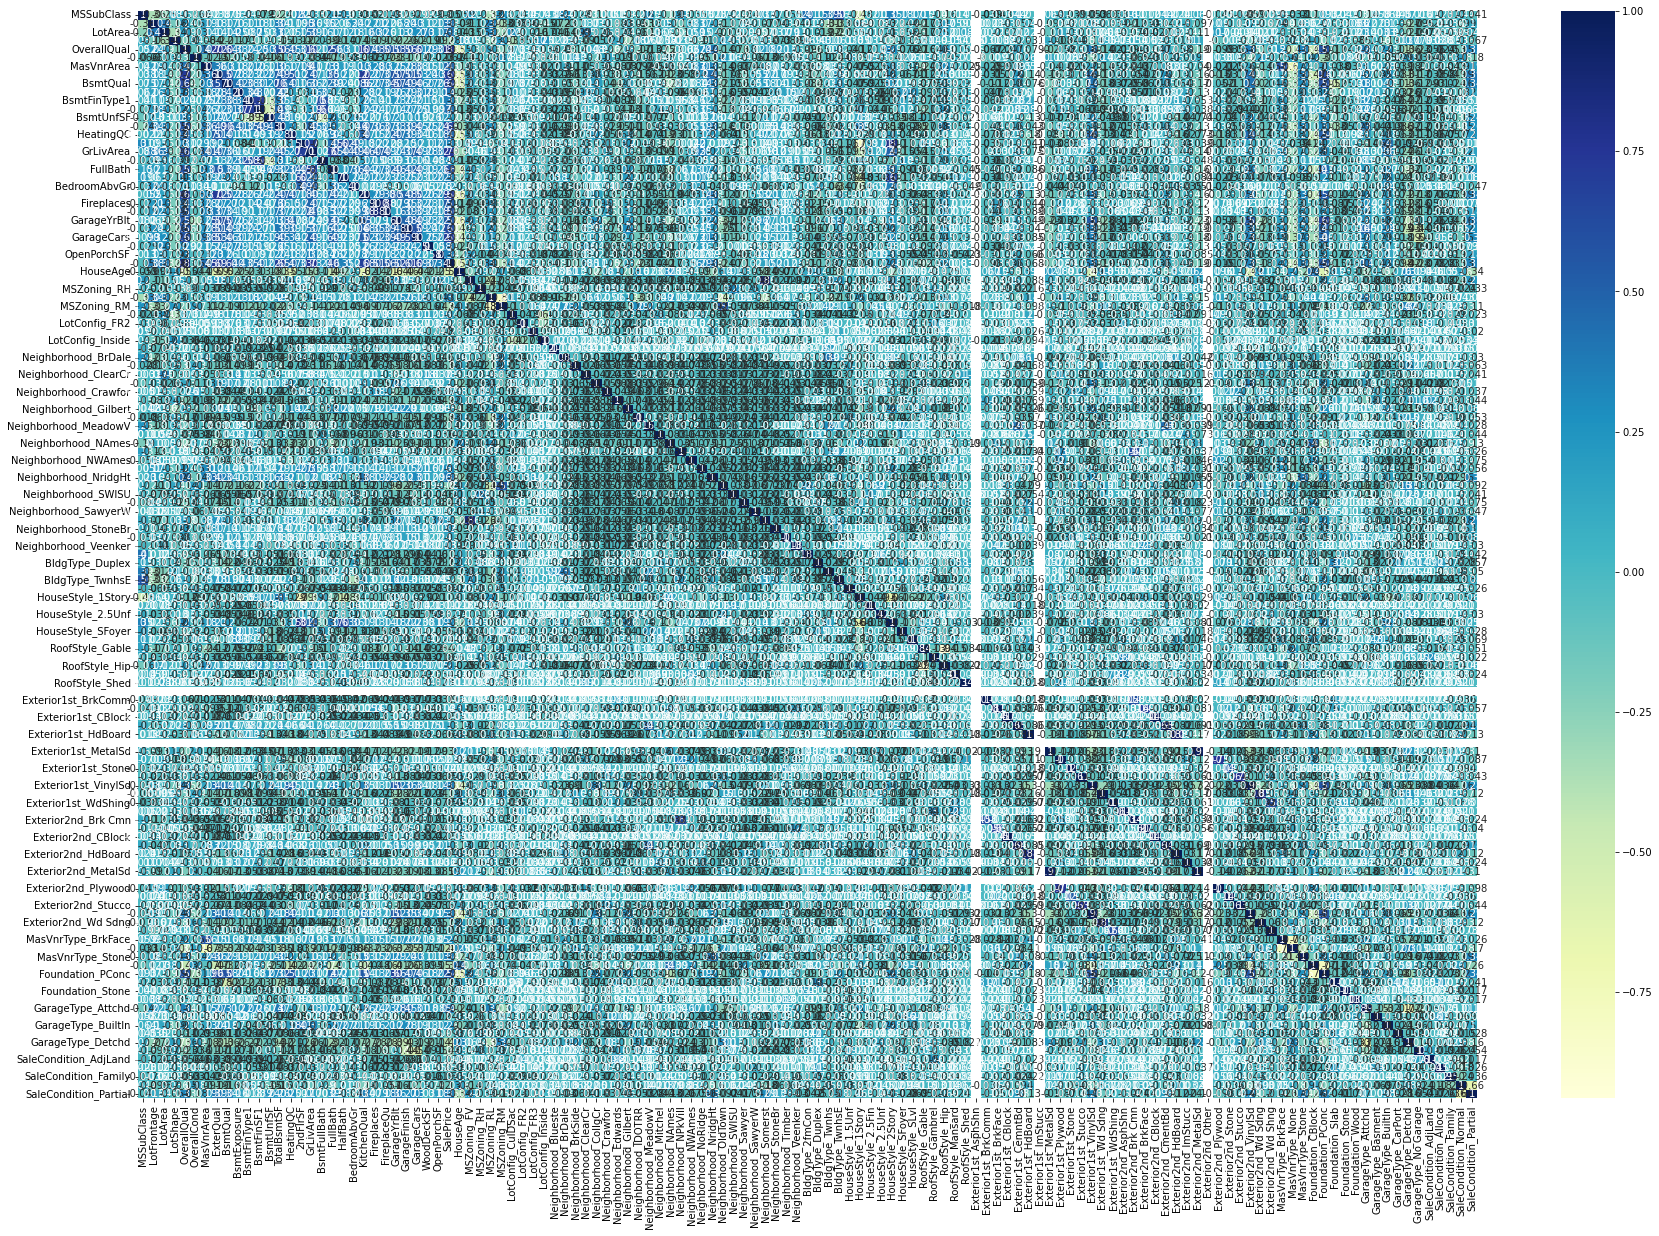

In [700]:
#check correlation using heatmap
plt.figure(figsize = (30, 20))
sns.heatmap(house_data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Due to unreadable, this is difficult to find out which variable is performing well, henceforth we will choose RFE to get best 50 features out of 127. Also we know target variable is 'SalePrice' henceforth we will conider this as 'y_train'

In [701]:
#Get X and y for Train data
y_train = house_data_train.pop('SalePrice')
X_train = house_data_train

#Get X and y for Test Data
y_test = house_data_test.pop('SalePrice')
X_test = house_data_test

### Model building and evaluation
Using 'Recursive Feature Elimination (RFE)' we will choose best 50 variable in the model

In [702]:
#Creating an object of linear Regression
house_data_lm = LinearRegression()

In [703]:
#Fitting a model
house_data_lm.fit(X_train,y_train)

#So we will be eliminating columns using RFE in a set of 50 features. 

house_data_rfe = RFE(house_data_lm, 50)

house_data_rfe = house_data_rfe.fit(X_train,y_train)

#### Check the variables selected by RFE

In [704]:
#Display columns selected by RFE and their weights.
rfe_temp = pd.DataFrame(list(zip(X_train.columns, house_data_rfe.support_,house_data_rfe.ranking_)), columns=['Feature', 'RFE_Support', 'RFE_Ranking']).sort_values(by='RFE_Ranking')
rfe_temp = rfe_temp.loc[rfe_temp['RFE_Ranking'] == 1]
rfe_temp.reset_index(drop=True, inplace=True)
rfe_temp

Feature  RFE_Support  RFE_Ranking
0              MSSubClass         True            1
1                HouseAge         True            1
2             MSZoning_FV         True            1
3             MSZoning_RH         True            1
4             MSZoning_RL         True            1
5             MSZoning_RM         True            1
6     Exterior1st_CemntBd         True            1
7      Exterior1st_CBlock         True            1
8     Exterior1st_BrkFace         True            1
9     Exterior1st_BrkComm         True            1
10         RoofStyle_Shed         True            1
11      RoofStyle_Mansard         True            1
12          RoofStyle_Hip         True            1
13      RoofStyle_Gambrel         True            1
14   Neighborhood_Crawfor         True            1
15   Neighborhood_Edwards         True            1
16        RoofStyle_Gable         True            1
17      HouseStyle_2.5Unf         True            1
18   Neighborhood_MeadowV         True            1
19      HouseStyle_2.5Fin         True            1
20   Neighborhood_Veenker         True            1
21   Neighborhood_StoneBr         True            1
22   Neighborhood_Somerst         True            1
23   Neighborhood_NoRidge         True            1
24   Neighborhood_NridgHt         True            1
25             GarageCars         True            1
26   Neighborhood_OldTown         True            1
27            GarageYrBlt         True            1
28  SaleCondition_AdjLand         True            1
29                LotArea         True            1
30            OverallQual         True            1
31            OverallCond         True            1
32     GarageType_BuiltIn         True            1
33               BsmtQual         True            1
34           BsmtExposure         True            1
35      GarageType_Attchd         True            1
36             BsmtFinSF1         True            1
37        Foundation_Wood         True            1
38    Exterior2nd_CmentBd         True            1
39            TotalBsmtSF         True            1
40       Foundation_Stone         True            1
41              GrLivArea         True            1
42           BsmtFullBath         True            1
43        Foundation_Slab         True            1
44       MasVnrType_Stone         True            1
45        MasVnrType_None         True            1
46            KitchenQual         True            1
47             Fireplaces         True            1
48     MasVnrType_BrkFace         True            1
49              HeatingQC         True            1

In [705]:
#Display Columns selected by RFE. 
rfeFeatures = X_train.columns[house_data_rfe.support_]
rfeFeatures

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtQual',
       'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'HouseAge', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageTyp

In [706]:
#Take into account the RFE features as new Train and Test sets
X_train_new = X_train[rfeFeatures]
X_test_new = X_test[rfeFeatures]
print("X_train_new shape with 50 features: ", X_train_new.shape)
print("X_test_new shape with 50 features: ", X_test_new.shape)
print("y_train shape with 50 features: ", y_train.shape)
print("y_test shape with 50 features: ", y_test.shape)

X_train_new shape with 50 features:  (1017, 50)
X_test_new shape with 50 features:  (436, 50)
y_train shape with 50 features:  (1017,)
y_test shape with 50 features:  (436,)


In [707]:
#Let's fit new Train and find R2 score for them.
house_data_lm.fit(X_train_new, y_train)

LinearRegression()

In [708]:
#Let's display coefficient and intercept.
print(house_data_lm.intercept_)
print(house_data_lm.coef_)

0.005964187645049246
[-0.02824123  0.06845614  0.134807    0.08226472  0.06256715  0.02495291
  0.04175257  0.0530483   0.02343279  0.34104092  0.02231173  0.02281791
  0.03191078  0.03794552  0.07930806 -0.02193486  0.11125917  0.10438345
  0.11505805  0.09459336  0.03994248 -0.02185586 -0.03626223  0.02595974
  0.04121719 -0.02246687  0.04007317  0.06796261  0.02203754 -0.03710292
  0.02848693 -0.03317327 -0.03036357 -0.03158693 -0.02984532 -0.02943741
 -0.09890529  0.02727576 -0.00947125 -0.02807941  0.02043265  0.03199799
  0.0288028   0.03313507  0.03735716  0.03297885 -0.02938796  0.02043925
  0.014738    0.01940793]


In [709]:
#Creating a function which will print R2 Score, RSS, MSE and RMSE for both Train and Test Data
def calculate_metric(y_train, y_train_pred, y_test, y_test_pred):
    
    metric = []

    r2_train_lr = r2_score(y_train, y_train_pred)
    print('Train R2 score: ', r2_train_lr)
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_test_pred)
    print('Test R2 score: ', r2_test_lr)
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_train_pred))
    print('Train RSS score: ', rss1_lr)
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_test_pred))
    print('Test RSS score: ', rss2_lr)
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_train_pred)
    print('Train MSE score: ', mse_train_lr)
    metric.append(mse_train_lr)

    mse_test_lr = mean_squared_error(y_test, y_test_pred)
    print('Test MSE score: ', mse_test_lr)
    metric.append(mse_test_lr)

    rmse_train_lr = mse_train_lr**0.5
    print('Train RMSE score: ', rmse_train_lr)
    metric.append(rmse_train_lr)

    rmse_test_lr = mse_test_lr**0.5
    print('Test RMSE score: ', rmse_test_lr)
    metric.append(rmse_test_lr)
    
    return metric

In [710]:
#Predict train and test set
y_train_pred = house_data_lm.predict(X_train_new)
y_test_pred = house_data_lm.predict(X_test_new)

#Metric data without Regularization
metric1 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)


Train R2 score:  0.9170350501800041
Test R2 score:  0.8813123969818731
Train RSS score:  1.454276473703461
Test RSS score:  0.8446208981850918
Train MSE score:  0.001429967034123364
Test MSE score:  0.0019372038949199352
Train RMSE score:  0.03781490492019468
Test RMSE score:  0.04401367849793897


### Regularization using Ridge Regression

In [711]:
#list of alphas (lambda parameter): Ridge Regression Model
parm = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = parm, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [712]:
# Printing the best hyperparameter alpha
print("Ridge Best param: ", ridge_model_cv.best_params_)
print("Ridge Best Score: ", ridge_model_cv.best_score_)
print("Ridge Best estimator: ", ridge_model_cv.best_estimator_)

#Display mean scores 
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Ridge Best param:  {'alpha': 0.6}
Ridge Best Score:  0.9019569151218503
Ridge Best estimator:  Ridge(alpha=0.6)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001          0.918708         0.899145               15
1        0.001          0.918708         0.899161               14
2         0.01          0.918707         0.899314               13
3         0.05          0.918691         0.899900               11
4          0.1          0.918648         0.900462               10
5          0.2          0.918504         0.901199                9
6          0.3          0.918309         0.901614                7
7          0.4          0.918079         0.901837                5
8          0.5          0.917827         0.901938                2
9          0.6          0.917559         0.901957                1
10         0.7          0.917278         0.901919                3
11         0.8          0.916989         0.901839                4
12         0.9          0.916694         0.901729                6
13         1.0          0.916394         0.901595                8
14         2.0          0.913291         0.899631               12
15         3.0          0.910185         0.897243               16
16         4.0          0.907149         0.894730               17
17         5.0          0.904199         0.892186               18
18         6.0          0.901337         0.889651               19
19         7.0          0.898560         0.887144               20
20         8.0          0.895865         0.884677               21
21         9.0          0.893246         0.882254               22
22        10.0          0.890697         0.879876               23
23          20          0.868192         0.858357               24
24          50          0.817309         0.808483               25
25         100          0.755040         0.747003               26
26         500          0.494262         0.488491               27
27        1000          0.347317         0.342203               28

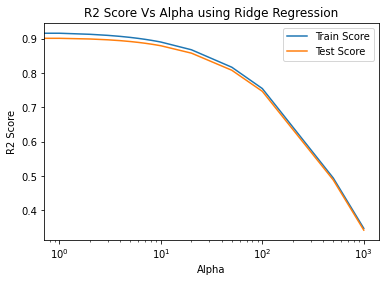

In [713]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to int
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# Plotting R2 Score of Train score
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha using Ridge Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

##### Based on above data for Ridge Regression best Alpha Value is "0.6" for processing.

In [714]:
#Fitting Ridge model for alpha = 0.6 and printing coefficients which have been penalised
alpha = 0.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[-0.0245676   0.07060728  0.14101428  0.080584    0.05974289  0.02419197
  0.04210124  0.05964871  0.02370504  0.31140251  0.02090476  0.02688598
  0.03522746  0.03466639  0.08019706 -0.02316845  0.08168859  0.07499323
  0.08775321  0.06637537  0.04046669 -0.0211726  -0.03482709  0.02899615
  0.03940798 -0.02117555  0.04039586  0.06381672  0.01906184 -0.02050478
  0.02491481 -0.02367084 -0.01814114 -0.02228201 -0.01590773 -0.01376495
 -0.07182496  0.02718295 -0.00464896 -0.01844522  0.01075318  0.02569065
  0.02234946  0.02646272  0.03619149  0.02054733 -0.02081897  0.02094615
  0.01801612  0.01600792]


In [715]:
#Predict Train and Test set using Ridge
y_train_pred = ridge.predict(X_train_new)
y_test_pred = ridge.predict(X_test_new)

#Metric data after Regularization using Ridge Regression model 
metric2 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)


Train R2 score:  0.9162825436491097
Test R2 score:  0.8795822207738263
Train RSS score:  1.4674670143662625
Test RSS score:  0.8569334139466228
Train MSE score:  0.0014429370839392946
Test MSE score:  0.0019654436099693184
Train RMSE score:  0.037986011687715975
Test RMSE score:  0.04433332392195873


##### We have a good train score 91.63% and good test score as well 87.96%.

In [716]:
#Top 10 features of Ridge Regression
ridge_param_df = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient':ridge.coef_})
(ridge_param_df.sort_values('Coeficient', ascending=False)).head(10)

Features  Coeficient
9              GrLivArea    0.311403
2            OverallQual    0.141014
18           MSZoning_RL    0.087753
16           MSZoning_FV    0.081689
3            OverallCond    0.080584
14            GarageCars    0.080197
17           MSZoning_RH    0.074993
1                LotArea    0.070607
19           MSZoning_RM    0.066375
27  Neighborhood_StoneBr    0.063817

### Regularization using Lasso Regression

In [717]:
# list of alphas (lambda parameter) to tune

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [718]:
# Printing the best hyperparameter alpha
print("Lasso Best param: ", lasso_model_cv.best_params_)
print("Lasso Best Score: ", lasso_model_cv.best_score_)
print("Lasso Best estimator: ", lasso_model_cv.best_estimator_)

#display mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Lasso Best param:  {'alpha': 0.0001}
Lasso Best Score:  0.9006312757896637
Lasso Best estimator:  Lasso(alpha=0.0001)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0       0.0001          0.915024         0.900631                1
1        0.001          0.886060         0.875581                2
2         0.01          0.545715         0.533401                3
3         0.05          0.000000        -0.004536                4
4          0.1          0.000000        -0.004536                4
5          0.2          0.000000        -0.004536                4
6          0.3          0.000000        -0.004536                4
7          0.4          0.000000        -0.004536                4
8          0.5          0.000000        -0.004536                4
9          0.6          0.000000        -0.004536                4
10         0.7          0.000000        -0.004536                4
11         0.8          0.000000        -0.004536                4
12         0.9          0.000000        -0.004536                4
13         1.0          0.000000        -0.004536                4
14         2.0          0.000000        -0.004536                4
15         3.0          0.000000        -0.004536                4
16         4.0          0.000000        -0.004536                4
17         5.0          0.000000        -0.004536                4
18         6.0          0.000000        -0.004536                4
19         7.0          0.000000        -0.004536                4
20         8.0          0.000000        -0.004536                4
21         9.0          0.000000        -0.004536                4
22        10.0          0.000000        -0.004536                4
23          20          0.000000        -0.004536                4
24          50          0.000000        -0.004536                4
25         100          0.000000        -0.004536                4
26         500          0.000000        -0.004536                4
27        1000          0.000000        -0.004536                4

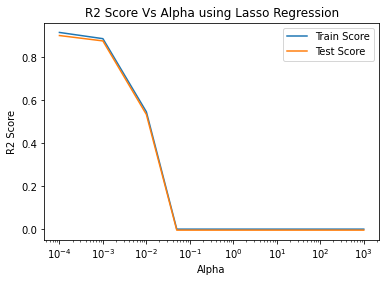

In [719]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to float
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting R2 Score of Train score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha using Lasso Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

##### Based on above data for Lasso Regression best Alpha Value is "0.0001" for processing.

In [720]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001, 0.01]}

lasso = Lasso()

# cross validation
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [721]:
# Printing the best hyperparameter alpha
print("Lasso Best param: ", lasso_model_cv.best_params_)
print("Lasso Best Score: ", lasso_model_cv.best_score_)
print("Lasso Best estimator: ", lasso_model_cv.best_estimator_)
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

Lasso Best param:  {'alpha': 0.0001}
Lasso Best Score:  0.9006312757896637
Lasso Best estimator:  Lasso(alpha=0.0001)


param_alpha  mean_train_score  mean_test_score  rank_test_score
0      0.0001          0.915024         0.900631                1
1       0.001          0.886060         0.875581                2
2        0.01          0.545715         0.533401                3

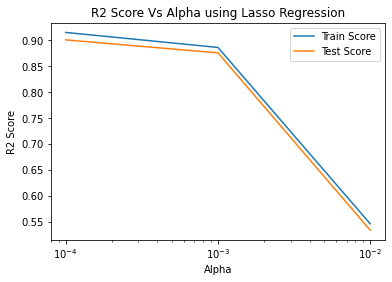

In [722]:
# plotting mean test and train scores with alpha 

# Converting the 'param_alpha' datatype from object to float
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting R2 Score of Train score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])

# Plotting R2 Score of Test score
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])

plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score Vs Alpha using Lasso Regression")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xscale('log')
plt.show()

In [723]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised
alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_new, y_train)
print(lasso.coef_)

[-2.33383660e-02  6.01612539e-02  1.54474281e-01  7.75526001e-02
  5.27578008e-02  2.58969019e-02  4.21378177e-02  5.10855614e-02
  2.34850432e-02  3.30819823e-01  2.07910222e-02  2.61337115e-02
  3.26564281e-02  3.00360639e-02  7.90896304e-02 -2.40631361e-02
  4.72020232e-02  3.56736760e-02  5.50710024e-02  3.03683696e-02
  3.59428690e-02 -1.95494173e-02 -2.06503644e-02  2.17922830e-02
  3.68576117e-02 -1.97145659e-02  3.87368953e-02  5.66428173e-02
  9.57316224e-03 -0.00000000e+00  5.99687030e-03 -1.94261972e-03
  0.00000000e+00 -3.08000369e-04  0.00000000e+00  0.00000000e+00
 -2.93994346e-02  2.63911771e-02 -0.00000000e+00 -8.05415443e-03
 -0.00000000e+00  2.81397472e-03  0.00000000e+00  3.63701100e-03
  2.44361496e-02  0.00000000e+00 -0.00000000e+00  2.04344339e-02
  1.39448619e-02  0.00000000e+00]


In [724]:
#Predicting Train and Test sets using Lasso 
y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

#Metric after Lasso Regularization
metric3 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)


Train R2 score:  0.9132942706373944
Test R2 score:  0.8794965157127277
Train RSS score:  1.5198478709493042
Test RSS score:  0.8575433199843501
Train MSE score:  0.0014944423509825999
Test MSE score:  0.001966842477028326
Train RMSE score:  0.03865801793913651
Test RMSE score:  0.04434909781526932


##### We have a good train score 91.33% and good test score as well 87.95%.

In [725]:
#Top 10 feature of Lasso Regression
lasso_param_df = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient':lasso.coef_})
(lasso_param_df.sort_values('Coeficient', ascending=False)).head(10)

Features  Coeficient
9              GrLivArea    0.330820
2            OverallQual    0.154474
14            GarageCars    0.079090
3            OverallCond    0.077553
1                LotArea    0.060161
27  Neighborhood_StoneBr    0.056643
18           MSZoning_RL    0.055071
4               BsmtQual    0.052758
7            TotalBsmtSF    0.051086
16           MSZoning_FV    0.047202

In [726]:
# Let's compare all metrics by creating a table which will contain all together

lr_table = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                        'RMSE (Train)','RMSE (Test)'], 
            'Linear Regression': metric1
           }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metrics', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metrics  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.917035          0.916283          0.913294
1   R2 Score (Test)           0.881312          0.879582          0.879497
2       RSS (Train)           1.454276          1.467467          1.519848
3        RSS (Test)           0.844621          0.856933          0.857543
4       MSE (Train)           0.001430          0.001443          0.001494
5        MSE (Test)           0.001937          0.001965          0.001967
6      RMSE (Train)           0.037815          0.037986          0.038658
7       RMSE (Test)           0.044014          0.044333          0.044349

#### Observe the changes in the coefficients after Regularization

In [727]:
betas = pd.DataFrame(index=X_train_new.columns)

In [728]:
betas.rows = X_train_new.columns

In [730]:
#Display Linear,Ridge and Lasso coefficients
betas['Linear'] = house_data_lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [731]:
pd.set_option('display.max_rows', None)
betas.head(50)

Linear     Ridge     Lasso
MSSubClass            -0.028241 -0.024568 -0.023338
LotArea                0.068456  0.070607  0.060161
OverallQual            0.134807  0.141014  0.154474
OverallCond            0.082265  0.080584  0.077553
BsmtQual               0.062567  0.059743  0.052758
BsmtExposure           0.024953  0.024192  0.025897
BsmtFinSF1             0.041753  0.042101  0.042138
TotalBsmtSF            0.053048  0.059649  0.051086
HeatingQC              0.023433  0.023705  0.023485
GrLivArea              0.341041  0.311403  0.330820
BsmtFullBath           0.022312  0.020905  0.020791
KitchenQual            0.022818  0.026886  0.026134
Fireplaces             0.031911  0.035227  0.032656
GarageYrBlt            0.037946  0.034666  0.030036
GarageCars             0.079308  0.080197  0.079090
HouseAge              -0.021935 -0.023168 -0.024063
MSZoning_FV            0.111259  0.081689  0.047202
MSZoning_RH            0.104383  0.074993  0.035674
MSZoning_RL            0.115058  0.087753  0.055071
MSZoning_RM            0.094593  0.066375  0.030368
Neighborhood_Crawfor   0.039942  0.040467  0.035943
Neighborhood_Edwards  -0.021856 -0.021173 -0.019549
Neighborhood_MeadowV  -0.036262 -0.034827 -0.020650
Neighborhood_NoRidge   0.025960  0.028996  0.021792
Neighborhood_NridgHt   0.041217  0.039408  0.036858
Neighborhood_OldTown  -0.022467 -0.021176 -0.019715
Neighborhood_Somerst   0.040073  0.040396  0.038737
Neighborhood_StoneBr   0.067963  0.063817  0.056643
Neighborhood_Veenker   0.022038  0.019062  0.009573
HouseStyle_2.5Fin     -0.037103 -0.020505 -0.000000
HouseStyle_2.5Unf      0.028487  0.024915  0.005997
RoofStyle_Gable       -0.033173 -0.023671 -0.001943
RoofStyle_Gambrel     -0.030364 -0.018141  0.000000
RoofStyle_Hip         -0.031587 -0.022282 -0.000308
RoofStyle_Mansard     -0.029845 -0.015908  0.000000
RoofStyle_Shed        -0.029437 -0.013765  0.000000
Exterior1st_BrkComm   -0.098905 -0.071825 -0.029399
Exterior1st_BrkFace    0.027276  0.027183  0.026391
Exterior1st_CBlock    -0.009471 -0.004649 -0.000000
Exterior1st_CemntBd   -0.028079 -0.018445 -0.008054
Exterior2nd_CmentBd    0.020433  0.010753 -0.000000
MasVnrType_BrkFace     0.031998  0.025691  0.002814
MasVnrType_None        0.028803  0.022349  0.000000
MasVnrType_Stone       0.033135  0.026463  0.003637
Foundation_Slab        0.037357  0.036191  0.024436
Foundation_Stone       0.032979  0.020547  0.000000
Foundation_Wood       -0.029388 -0.020819 -0.000000
GarageType_Attchd      0.020439  0.020946  0.020434
GarageType_BuiltIn     0.014738  0.018016  0.013945
SaleCondition_AdjLand  0.019408  0.016008  0.000000

## Residual Analysis 

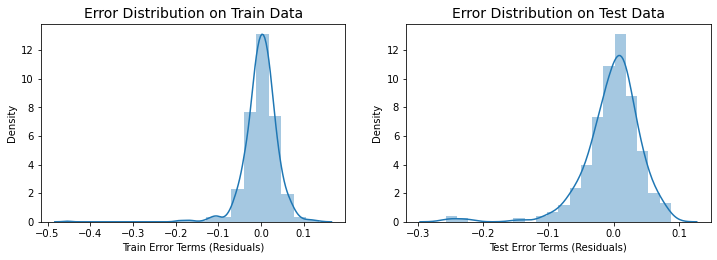

In [732]:
plt.figure(figsize=(12,8))

#Train Data Plot
plt.subplot(2,2,1)
residual_train = y_train - y_train_pred
sns.distplot(residual_train, bins=20)
plt.title("Error Distribution on Train Data", fontdict={'fontsize': 14})
plt.xlabel("Train Error Terms (Residuals)")

#Test Data Plot
plt.subplot(2,2,2)
residual_test = y_test - y_test_pred
sns.distplot(residual_test, bins=20)
plt.title("Error Distribution on Test Data", fontdict={'fontsize': 14})
plt.xlabel("Test Error Terms (Residuals)")

plt.show()

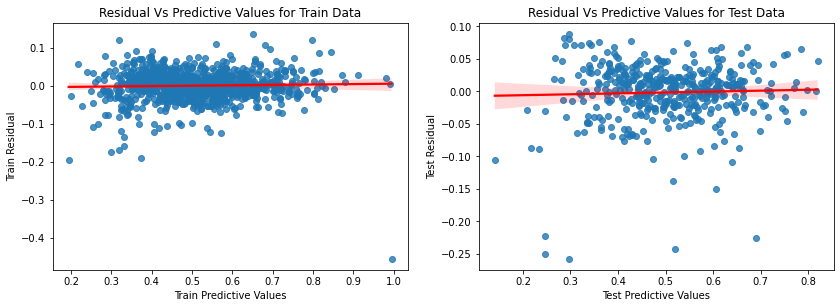

In [733]:
plt.figure(figsize=(14,10))
#Train Data
plt.subplot(2,2,1)
sns.regplot(x=y_train_pred,y=residual_train, line_kws={"color": "red"})
plt.title("Residual Vs Predictive Values for Train Data", fontdict={'fontsize':12})
plt.xlabel("Train Predictive Values")
plt.ylabel("Train Residual")

#Test Data
plt.subplot(2,2,2)
sns.regplot(x=y_test_pred,y=residual_test, line_kws={"color": "red"})
plt.title("Residual Vs Predictive Values for Test Data", fontdict={'fontsize':12})
plt.xlabel("Test Predictive Values")
plt.ylabel("Test Residual")
plt.show()

##### There is no relation and specific pattern between residual and predicted values, henceforth it's a good model

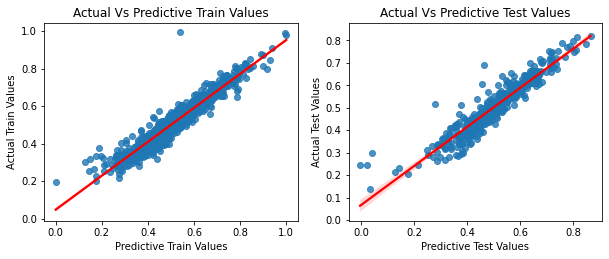

In [734]:
plt.figure(figsize=(10,8))

#Train Data
plt.subplot(2,2,1)
sns.regplot(x=y_train,y=y_train_pred, line_kws={"color": "red"})
plt.title("Actual Vs Predictive Train Values", fontdict={'fontsize':12})
plt.xlabel("Predictive Train Values")
plt.ylabel("Actual Train Values")

#Test Data
plt.subplot(2,2,2)
sns.regplot(x=y_test,y=y_test_pred, line_kws={"color": "red"})
plt.title("Actual Vs Predictive Test Values", fontdict={'fontsize':12})
plt.xlabel("Predictive Test Values")
plt.ylabel("Actual Test Values")

plt.show()

#### Conclusion:
- The residual analysis for both test and train data seem to fit the assumptions of the Linear Regression.
- Residuals have mean of zero and closely normally distributed.
- Residuals do not have any pattern hence it has homoscedasticity.

Below are the TOP 10 variables which are significant in predicting the Sale Price.

- GrLivArea: Above grade (ground) living area square feet.
- OverallQual: Rates the overall material and finish of the house.
- GarageCars: Size of garage in car capacity.
- OverallCond: Rates the overall condition of the house.
- LotArea: Lot size in square feet
- Neighborhood_StoneBR: Physical locations within Ames city limits - Stone Brook
- MSZoning_RL: Identifies residential with Low Density zone.
- BsmtQual: Evaluates the height of the basement
- TotalBsmtSF: Total square feet of basement area
- MSZoning_FV: Identifies residential with Floating Village Residential

##### Ridge Regression
- R2 score(Train): 91.63%
- R2 score(Test): 87.76%


##### Lasso Regression
- R2 score(Train): 91.33%
- R2 score(Test): 87.95%

Optimal value of alpha for Ridge and Lasso Regression is below:
- Alpha value for Ridge Regression: 0.6
- Alpha value for Lasso Regression: 0.0001

# Problem Statement - Part II
## Subjective Questions - Demonstration/Validation

##### Question 1 
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


Answer:

Optimal value of alpha for Ridge and Lasso Regression is below:
- Alpha value for Ridge Regression: 0.6
- Alpha value for Lasso Regression: 0.0001

Validating the model by doubling the alpha values for Ridge and Lasso:

In [735]:
#Fitting Ridge model for alpha = 1.2 and printing coefficients which have been penalised
alpha_2 = 1.2
ridge_2 = Ridge(alpha=alpha_2)

ridge_2.fit(X_train_new, y_train)

Ridge(alpha=1.2)

In [736]:
#Predict Train and Test sets after doubling alpha using Ridge Regression
y_train_pred = ridge_2.predict(X_train_new)
y_test_pred = ridge_2.predict(X_test_new)

#Metric after doubling the Alpha for Ridge Regression model 
metric4 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)


Train R2 score:  0.9149645844262635
Test R2 score:  0.877568679665341
Train RSS score:  1.4905692653197589
Test RSS score:  0.8712624496364048
Train MSE score:  0.0014656531615730175
Test MSE score:  0.001998308370725699
Train RMSE score:  0.03828384987919864
Test RMSE score:  0.044702442558832274


##### Train R2 score reduces little bit from 91.63% to 91.50% and Test R2 score also reduce from 87.96% to 87.76%.

In [737]:
#Top 10 feature of Ridge Regression (after doubling the Alpha)
ridge_param_df_2 = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient_2':ridge_2.coef_})
(ridge_param_df_2.sort_values('Coeficient_2', ascending=False)).head(10)

Features  Coeficient_2
9              GrLivArea      0.289025
2            OverallQual      0.143594
14            GarageCars      0.081073
3            OverallCond      0.078273
18           MSZoning_RL      0.072246
1                LotArea      0.070564
16           MSZoning_FV      0.065488
7            TotalBsmtSF      0.063503
27  Neighborhood_StoneBr      0.060679
17           MSZoning_RH      0.058659

In [738]:
#Increasing Alpha value of Lasso Regression from 0.0001 to 0.0002 
alpha_0002 = 0.0002
lasso_0002 = Lasso(alpha=alpha_0002)

lasso_0002.fit(X_train_new, y_train)

Lasso(alpha=0.0002)

In [739]:
#Predict Train and Test sets after doubling alpha using Lasso Regression
y_train_pred = lasso_0002.predict(X_train_new)
y_test_pred = lasso_0002.predict(X_test_new)

#Metric after doubling the alpha for Lasso Regression
metric5 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)


Train R2 score:  0.9092978502876039
Test R2 score:  0.8766951608635047
Train RSS score:  1.589900346197464
Test RSS score:  0.8774787031980831
Train MSE score:  0.0015633238409021278
Test MSE score:  0.002012565833023126
Train RMSE score:  0.03953889023356786
Test RMSE score:  0.04486162985250454


##### Train R2 score reduces little bit from 91.33% to 90.93% and Test R2 score also reduce from 87.95% to 87.67%.

In [740]:
#Top 10 feature of Lasso Regression (after doubling the alpha)
lasso_param_df_0002 = pd.DataFrame({'Features':X_train_new.columns, 'Coeficient_0002':lasso_0002.coef_})
(lasso_param_df_0002.sort_values('Coeficient_0002', ascending=False)).head(10)

Features  Coeficient_0002
9              GrLivArea         0.327614
2            OverallQual         0.165880
14            GarageCars         0.080845
3            OverallCond         0.070143
27  Neighborhood_StoneBr         0.047568
1                LotArea         0.046789
7            TotalBsmtSF         0.046764
6             BsmtFinSF1         0.044130
4               BsmtQual         0.042628
26  Neighborhood_Somerst         0.037226

In [741]:
# Let's compare all metrics by creating a table which will contain all together
mt_table_2 = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                          'RMSE (Train)','RMSE (Test)'], 
              'Ridge Regression_1': metric2, 
              'Lasso Regression_0.0001': metric3, 
              'Ridge Regression_2': metric4, 
              'Lasso Regression_0.0002': metric5, 
            }

final_metric_2 = pd.DataFrame(mt_table_2 ,columns = ['Metrics', 'Ridge Regression_1', 'Lasso Regression_0.0001', 'Ridge Regression_2', 'Lasso Regression_0.0002'] )

final_metric_2

Metrics  Ridge Regression_1  Lasso Regression_0.0001  \
0  R2 Score (Train)            0.916283                 0.913294   
1   R2 Score (Test)            0.879582                 0.879497   
2       RSS (Train)            1.467467                 1.519848   
3        RSS (Test)            0.856933                 0.857543   
4       MSE (Train)            0.001443                 0.001494   
5        MSE (Test)            0.001965                 0.001967   
6      RMSE (Train)            0.037986                 0.038658   
7       RMSE (Test)            0.044333                 0.044349   

   Ridge Regression_2  Lasso Regression_0.0002  
0            0.914965                 0.909298  
1            0.877569                 0.876695  
2            1.490569                 1.589900  
3            0.871262                 0.877479  
4            0.001466                 0.001563  
5            0.001998                 0.002013  
6            0.038284                 0.039539  
7            0.044702                 0.044862

##### There is minor reduction in both train and test R2 score when we double the value of alpha

In [742]:
#Lets observe the changes in the co-efficient after the regularization with doubling the alpha
betas_2 = pd.DataFrame(index=X_train_new.columns)

In [743]:
betas_2.rows = X_train_new.columns

In [744]:
betas_2['Ridge_2'] = ridge_2.coef_
betas_2['Lasso_0002'] = lasso_0002.coef_

In [745]:
pd.set_option('display.max_rows', None)
betas_2.head(50)

Ridge_2  Lasso_0002
MSSubClass            -0.022128   -0.021593
LotArea                0.070564    0.046789
OverallQual            0.143594    0.165880
OverallCond            0.078273    0.070143
BsmtQual               0.057629    0.042628
BsmtExposure           0.023726    0.025479
BsmtFinSF1             0.042498    0.044130
TotalBsmtSF            0.063503    0.046764
HeatingQC              0.023912    0.023261
GrLivArea              0.289025    0.327614
BsmtFullBath           0.019772    0.019735
KitchenQual            0.030279    0.028143
Fireplaces             0.038009    0.033220
GarageYrBlt            0.032507    0.026290
GarageCars             0.081073    0.080845
HouseAge              -0.024210   -0.026039
MSZoning_FV            0.065488    0.015205
MSZoning_RH            0.058659    0.000000
MSZoning_RL            0.072246    0.027297
MSZoning_RM            0.050071    0.000000
Neighborhood_Crawfor   0.040846    0.032368
Neighborhood_Edwards  -0.020784   -0.018723
Neighborhood_MeadowV  -0.033993   -0.008935
Neighborhood_NoRidge   0.031424    0.017716
Neighborhood_NridgHt   0.038071    0.033587
Neighborhood_OldTown  -0.019981   -0.018416
Neighborhood_Somerst   0.039637    0.037226
Neighborhood_StoneBr   0.060679    0.047568
Neighborhood_Veenker   0.017221    0.000000
HouseStyle_2.5Fin     -0.011757   -0.000000
HouseStyle_2.5Unf      0.022912    0.000000
RoofStyle_Gable       -0.019732   -0.001266
RoofStyle_Gambrel     -0.013101    0.000000
RoofStyle_Hip         -0.018306   -0.000000
RoofStyle_Mansard     -0.009516    0.000000
RoofStyle_Shed        -0.007575    0.000000
Exterior1st_BrkComm   -0.056943   -0.000000
Exterior1st_BrkFace    0.026964    0.024648
Exterior1st_CBlock    -0.002968   -0.000000
Exterior1st_CemntBd   -0.013403   -0.005777
Exterior2nd_CmentBd    0.006054   -0.000000
MasVnrType_BrkFace     0.021914    0.002225
MasVnrType_None        0.018378   -0.000000
MasVnrType_Stone       0.022591    0.002647
Foundation_Slab        0.034587    0.009267
Foundation_Stone       0.014434    0.000000
Foundation_Wood       -0.015331   -0.000000
GarageType_Attchd      0.021319    0.020110
GarageType_BuiltIn     0.020545    0.012665
SaleCondition_AdjLand  0.013639    0.000000

##### Below are the TOP 10 variables which are significant in predicting the Sale Price after doubling ALPHA values.

- GrLivArea: Above grade (ground) living area square feet.
- OverallQual: Rates the overall material and finish of the house.
- GarageCars: Size of garage in car capacity.
- OverallCond: Rates the overall condition of the house.
- Neighborhood_StoneBr: Physical locations within Ames city limits - Stone Brook	
- LotArea:Lot size in square feet
- TotalBsmtSF:Total square feet of basement area
- BsmtFinSF1: Type 1 finished square feet
- BsmtQual: Evaluates the height of the basement
- Neighborhood_Somerst: Physical locations within Ames city limits - Somerset



##### Question 2 
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Answer: 

The Mean Squared Error of both the models are almost same. R2 Score of Lasso is better than Ridge for Test Data.


Since Lasso helps in feature reduction (as the coefficient value of some of the features become zero), Lasso has a better edge over Ridge and should be used as the final model. 
 

##### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

Answer: 

Below are the TOP 5 variables which are significant in predicting the Sale Price.
 
- GrLivArea: Above grade (ground) living area square feet
- OverallQual: Rates the overall material and finish of the house
- GarageCars: Size of garage in car capacity 
- OverallCond: Rates the overall condition of the house
- LotArea: Lot size in square feet


So let's remove those and again build model using Lasso Regression.

In [746]:
#drop Top 5 column list 
drop_top5 = ['GrLivArea', 'OverallQual', 'GarageCars', 'OverallCond', 'LotArea']

In [747]:
#Display the previous list of columns shape
print("\nShape of Train Data Set: ", X_train_new.shape)
print("\nShape of Test Data Set: ", X_test_new.shape)


Shape of Train Data Set:  (1017, 50)

Shape of Test Data Set:  (436, 50)


In [748]:
#Let's drop "drop_top5" from X_train_new.columns and X_test_new.columns
X_train_new_2 = X_train_new.drop(drop_top5, axis=1)
X_test_new_2 = X_test_new.drop(drop_top5, axis=1)

print("\nShape of Train Data Set after removing columns: ", X_train_new_2.shape)
print("\nShape of Test Data Set after removing columns: ", X_test_new_2.shape)


Shape of Train Data Set after removing columns:  (1017, 45)

Shape of Test Data Set after removing columns:  (436, 45)


#### Build lasso regression after dropping top 5 vairables from previous model

In [749]:
#Fitting lasso model for alpha = 0.0001 after droping the variable and fetching coefficient which have beeen penalised
alpha_drop = 0.0001
lasso_drop = Lasso(alpha=alpha_drop)

lasso_drop.fit(X_train_new_2, y_train)

Lasso(alpha=0.0001)

In [750]:
#Predict Train and Test sets using Lasso Regression (after dropping top5 variables)
y_train_pred = lasso_drop.predict(X_train_new_2)
y_test_pred = lasso_drop.predict(X_test_new_2)

#Display Metric for Lasso Regression after dropping top5 predictors 
metric6 = calculate_metric(y_train, y_train_pred, y_test, y_test_pred)


Train R2 score:  0.8218747128447826
Test R2 score:  0.7365098687916051
Train RSS score:  3.1223235238921605
Test RSS score:  1.8750843864472755
Train MSE score:  0.003070131291929361
Test MSE score:  0.004300652262493751
Train RMSE score:  0.05540876547920339
Test RMSE score:  0.0655793585093187


##### Train R2 score reduces drastically from 91.33% to 82.19% and Test R2 score also reduces from 87.95% to 73.65% after removal of Top 5 predictive variables.

In [753]:
#Top 10 feature of Lasso Regression now after dropping the top5 predictors 
lasso_param_df_drop = pd.DataFrame({'Features':X_train_new_2.columns, 'Coeficient_drop':lasso_drop.coef_})
(lasso_param_df_drop.sort_values('Coeficient_drop', ascending=False)).head(10)

Features  Coeficient_drop
4            TotalBsmtSF         0.190762
8             Fireplaces         0.103577
7            KitchenQual         0.101346
18  Neighborhood_NoRidge         0.099565
1               BsmtQual         0.090147
39       Foundation_Slab         0.081670
15  Neighborhood_Crawfor         0.075670
43    GarageType_BuiltIn         0.074215
11           MSZoning_FV         0.073219
13           MSZoning_RL         0.073151

In [754]:
# Let's compare the metrics by creating a table 
mt_table_3 = {'Metrics': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)', 
                          'RMSE (Train)','RMSE (Test)'], 
              'Lasso Regression_0.0001': metric3, 
              'Lasso Regression_after_drop_0.0001': metric6, 
             }

final_metric_3 = pd.DataFrame(mt_table_3 ,columns = ['Metrics', 'Lasso Regression_0.0001', 'Lasso Regression_after_drop_0.0001'] )

final_metric_3

Metrics  Lasso Regression_0.0001  \
0  R2 Score (Train)                 0.913294   
1   R2 Score (Test)                 0.879497   
2       RSS (Train)                 1.519848   
3        RSS (Test)                 0.857543   
4       MSE (Train)                 0.001494   
5        MSE (Test)                 0.001967   
6      RMSE (Train)                 0.038658   
7       RMSE (Test)                 0.044349   

   Lasso Regression_after_drop_0.0001  
0                            0.821875  
1                            0.736510  
2                            3.122324  
3                            1.875084  
4                            0.003070  
5                            0.004301  
6                            0.055409  
7                            0.065579

##### Both Train and Test R2 score drastically decreases in Lasso Regression, after we remove top 5 predictive variables

Below are the TOP 5 variables which are significant in predicting the Sale Price after removing 5 predictive variables from previous model:
- TotalBsmtSF: Total square feet of basement area
- Fireplaces: Number of fireplaces 
- KitchenQual: Kitchen quality
- Neighborhood_NoRidge: Physical locations within Ames city limits - Northridge 
- BsmtQual:Evaluates the height of the basement

	

##### Question 4 
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer:

Below are the pointers I learn from the course module lecture and note down as key point.
- Robust refers the model works for a broad range of inputs. If the model gets really good results at training time (it seems “more accurate”) but won’t generalize to out-of-sample data (i.e. it isn’t robust) then we call it overfitting.
- The model should be generalized so that the test accuracy is not lesser than the training score.
- Here in our case, based on all data and modelling both Ridge and Lasso performed good on Train and Test Data which shows our model with Alpah value "0.6" for Ridge and "0.0001" for Lasso is Robust and more Generalized model.
  - Simpler models are more generic
  - Simpler model requires fewer training samples
  - Simpler model are more robust
- Too much importance should not given to the outliers so that the accuracy predicted by the model is high. But outliers analysis needs to be done and only those which are relevant to the dataset need to be retained and rest should be dropped.
- If the accuracy of the Train and Test are same then that means model is overfitted and it learnt all the Train and Test data and model is not robust and generalized. So, it will drastically be failed and will not work on broad range of unseen data.